In [135]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [136]:
iris = np.genfromtxt('iris.txt', delimiter=',', dtype=None, usecols=(0, 1, 2, 3))

In [137]:
iris

array([[5.9, 3. , 4.2, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [6.6, 2.9, 4.6, 1.3],
       [4.6, 3.2, 1.4, 0.2],
       [6. , 2.2, 4. , 1. ],
       [4.7, 3.2, 1.3, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [5.8, 2.7, 5.1, 1.9],
       [6.7, 3.1, 5.6, 2.4],
       [6.7, 2.5, 5.8, 1.8],
       [5.1, 3.7, 1.5, 0.4],
       [5.1, 3.8, 1.5, 0.3],
       [5.7, 3. , 4.2, 1.2],
       [6.1, 3. , 4.9, 1.8],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.4, 1.6, 0.4],
       [5. , 3.4, 1.5, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [5. , 3.3, 1.4, 0.2],
       [7.2, 3.2, 6. , 1.8],
       [5.9, 3. , 5.1, 1.8],
       [6.5, 3. , 5.2, 2. ],
       [5.7, 4.4, 1.5, 0.4],
       [5.5, 2.5, 4. , 1.3],
       [4.9, 2.5, 4.5, 1.7],
       [5. , 3.5, 1.6, 0.6],
       [5.5, 2.3, 4. , 1.3],
       [4.6, 3.1, 1.5, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [6.8, 3.2, 5.9, 2.3],
       [5.4, 3.9, 1.3, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [5.8, 2.6, 4. , 1.2],
       [5.1, 2

In [138]:
# Compute DBSCAN
db = DBSCAN(eps=0.0001, min_samples=4).fit(iris)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 150


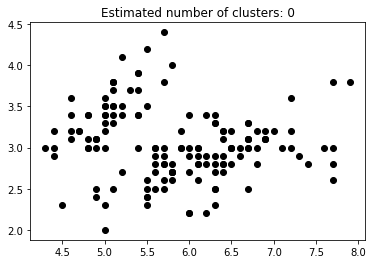

In [139]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = iris[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = iris[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()